# Temperature of Milan at 2018

I'm using the json of the dati.comune.milano.it

This is the link: https://dati.comune.milano.it/dataset/b8c56d42-267f-4f36-b4c9-bac058f7ae1e/resource/3115a08d-bc2a-4f22-923c-2523814122ed/download/temperature_.json

In [1]:
import json

In [2]:
import requests

url = 'https://dati.comune.milano.it/dataset/b8c56d42-267f-4f36-b4c9-bac058f7ae1e/resource/3115a08d-bc2a-4f22-923c-2523814122ed/download/temperature_.json'
r = requests.get(url, allow_redirects=True)

In [3]:
import urllib.request, json 
with urllib.request.urlopen(url) as url2:
    data = json.loads(url2.read().decode())
    print(data)

[{'Media': '3,5', 'Id Sensore': '2001', 'Zone': 'Lambrate', 'Data-Ora': '2018-01-01T00:00:00'}, {'Media': '3,2', 'Id Sensore': '5920', 'Zone': 'Zavattari', 'Data-Ora': '2018-01-01T00:00:00'}, {'Media': '4', 'Id Sensore': '5909', 'Zone': 'Juvara', 'Data-Ora': '2018-01-01T00:00:00'}, {'Media': '3,2', 'Id Sensore': '8162', 'Zone': 'Feltre', 'Data-Ora': '2018-01-01T00:00:00'}, {'Media': '3,6', 'Id Sensore': '5897', 'Zone': 'Brera', 'Data-Ora': '2018-01-01T00:00:00'}, {'Media': '3,8', 'Id Sensore': '5911', 'Zone': 'Marche', 'Data-Ora': '2018-01-01T00:00:00'}, {'Media': '3,3', 'Id Sensore': '2001', 'Zone': 'Lambrate', 'Data-Ora': '2018-01-01T01:00:00'}, {'Media': '3,1', 'Id Sensore': '5920', 'Zone': 'Zavattari', 'Data-Ora': '2018-01-01T01:00:00'}, {'Media': '3,8', 'Id Sensore': '5909', 'Zone': 'Juvara', 'Data-Ora': '2018-01-01T01:00:00'}, {'Media': '3,2', 'Id Sensore': '8162', 'Zone': 'Feltre', 'Data-Ora': '2018-01-01T01:00:00'}, {'Media': '3,4', 'Id Sensore': '5897', 'Zone': 'Brera', 'Data-

In [15]:
MediaOfDay = 0.0
count = 0
for singleData in data:
    if singleData['Id Sensore'] == data[0]['Id Sensore'] and singleData['Media'].strip()!="":
        MediaOfDay += float(singleData['Media'].replace(',','.'))
        count+=1

In [17]:
#This is the temperature take from all a year of all hours of the days.
MediaOfDay / count

15.1083056478406

In [29]:
MediaOfDayDict = {}
count = 0
for singleData in data:
    if singleData['Id Sensore'] == data[0]['Id Sensore'] and singleData['Media'].strip()!="":
        if  singleData['Data-Ora'][-8:] in MediaOfDayDict:
            MediaOfDayDict [singleData['Data-Ora'][-8:]]['Temperature'] += float(singleData['Media'].replace(',','.')) 
            MediaOfDayDict [singleData['Data-Ora'][-8:]]['Count'] += 1
        else:
            MediaOfDayDict [singleData['Data-Ora'][-8:]] = {}
            MediaOfDayDict [singleData['Data-Ora'][-8:]]['Temperature'] = float(singleData['Media'].replace(',','.')) 
            MediaOfDayDict [singleData['Data-Ora'][-8:]]['Count'] = 1

In [33]:
MediaOfDayDict.get('00:00:00')

{'Temperature': 4700.900000000001, 'Count': 364}

In [35]:
# https://matplotlib.org/stable/users/getting_started/
import matplotlib.pyplot as plt
import numpy as np

In [56]:
x = list(MediaOfDayDict.keys())

xHour = list(map(lambda xEl: xEl[:2],x))

y = []
for hour in MediaOfDayDict:
    y.append(float(MediaOfDayDict[hour]['Temperature'])/float(MediaOfDayDict[hour]['Count']))

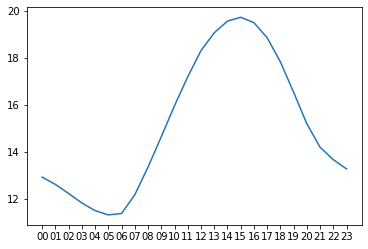

In [57]:
fig, ax = plt.subplots()
ax.plot(xHour, y)
plt.show()